# uso de imagem da camera do notebook para detecção de faces


Vamos importar as bibliotecas BytesIO, clear_output, Image,display.
Posteriormente, definimos uma variavel para padronizarmos a imagem, e outra variavel para exibir o video

In [6]:
## importante verificar a instalacao da biblioteca OpenCV. O comando para instalar é: pip install opencv-python. Caso tenha o anaconda o pip já estará instalado.
import cv2  
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

def imagem_padronizada(imagem):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, (400,300))
    return imagem

def video_exibir(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

Criamos um loop infinito até que o kernel seja interrompido para a exibição da camera do notebook ou outra que esteja conectada.
Se acontecer de a camera travar, adicione o comando capturar_video.release()

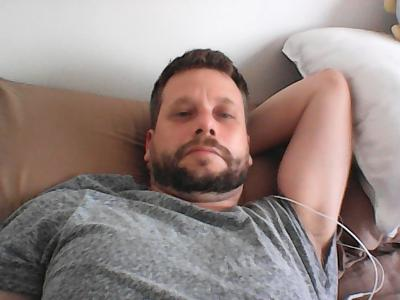

In [ ]:
capturar_video = cv2.VideoCapture(0)

try:
    while(True):
        captura_ok, frame = capturar_video.read()

        if captura_ok:
            frame = imagem_padronizada(frame)
            video_exibir(frame)

except KeyboardInterrupt:
    capturar_video.release()
    print("O video foi interrompido")

 Utilizamos  um classificador de cascata de Haar de face frontal e extraimos 100 exemplos. Vamos a salvar a imagem na escala de cinza(RGB2GRAY)

In [ ]:
capturar_video = cv2.VideoCapture(0)

classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

contador = 0

try:
    while(True):
        captura_ok, frame = capturar_video.read()

        if captura_ok:
            frame = imagem_padronizada(frame)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

            faces = classificador_face.detectMultiScale(frame_gray, 1.3, 5)

            if len(faces) > 0:
                contador += 1
                if contador <= 100:
                    for (x,y,w,h) in faces:
                        roi = frame_gray[y:y+h, x:x+w]
            cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LANCZOS4)
                        cv2.imwrite("diretório onde estão as imagens" + str(contador) + ".png", roi)
                    cv2.putText(frame, "Coletado " + str(contador) + " faces", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
                else:
                    cv2.putText(frame, "ConcluIdo", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("o video foi interrompido")

Carregar as imagens no diretório onde estão salvas

In [ ]:
imagens_caminho_treinamento = "diretorio..."
lista_faces_treinamento = [f for f in listdir(imagens_caminho_treinamento) if isfile(join(imagens_caminho_treinamento, f))]

Vamos coletar as faces

In [ ]:
dados_treinamento, sujeitos = [], []

for i, arquivo in enumerate(lista_faces_treinamento):
    imagem_caminho = imagens_caminho_treinamento + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    dados_treinamento.append(imagem)
    sujeitos.append(0)

sujeitos = np.asarray(sujeitos, dtype=np.int32)

 vamos treinar o modelo utilizando o algoritmo de LBPH.

In [ ]:
model_lbph = cv2.face.LBPHFaceRecognizer_create()
model_lbph.train(dados_treinamento, sujeitos)

Vamos copiar o código que usamos algumas celulas acima para extrairmos os exemplos e adaptarmos o modelo para inferir, frame a frame, a similaridade do rosto apresentado com o que treinamos.

In [ ]:
captura_video = cv2.VideoCapture(0)

classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

contador = 0

try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = imagem_padronizada(frame)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            faces = classificador_face.detectMultiScale(frame_gray, 1.3, 5)

            if len(faces) > 0:
                for (x,y,w,h) in faces:
                    roi = frame_gray[y:y+h, x:x+w]
                    roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LANCZOS4)
                    predicao = model_lbph.predict(roi)
                    cv2.putText(frame, "Similaridade " + str(predicao[1]), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("O video foi interrompido")

## ultimo passo, pegue o celular e bote a imagem de uma face de uma pessoa qualquer e acompanhe o resultado..
